In [45]:
!python --version

Python 3.11.7


In [1]:
import pandas as pd

In [2]:
print(pd.__version__)

2.1.4


In [3]:
import matplotlib
print(matplotlib.__version__)

3.8.0


In [4]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

In [48]:
import plotly.graph_objects as go
!pip show plotly

Name: plotly
Version: 5.9.0
Summary: An open-source, interactive data visualization library for Python
Home-page: https://plotly.com/python/
Author: Chris P
Author-email: chris@plot.ly
License: MIT
Location: C:\Users\Talitha\anaconda3\Lib\site-packages
Requires: tenacity
Required-by: 


In [5]:
df = pd.read_csv("D:\dados\Data\Tabela_Case_Mottu_2024_Vendas_&_Aluguel_Dados.csv",encoding='latin-1')

Pra responder a questão terei de tratar os dados, e análisar a qualidade deles.

### Tratando os dados 

Primeiro fiz a visualização da tabela 

In [6]:
df

,Data,A/V,Estado,Valor de Entrada,Caução
0,01/08/24,Aluguel,GO,NaN,700.0
1,01/08/24,Aluguel,PR,NaN,500.0
2,01/08/24,Venda,GO,2500.0,NaN
3,01/08/24,Aluguel,AM,NaN,500.0
4,01/08/24,Aluguel,BA,NaN,500.0
...,...,...,...,...,...
1999,8/31/2024,Aluguel,SC,NaN,500.0
2000,8/31/2024,Aluguel,BA,NaN,500.0
2001,8/31/2024,Aluguel,MT,NaN,500.0
2002,8/31/2024,Aluguel,AC,NaN,700.0


Precisei verificar o tipo dos dados, já que eles podem interferir na análise 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2004 entries, 0 to 2003
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Data              2004 non-null   object 
 1   A/V               2004 non-null   object 
 2   Estado            2004 non-null   object 
 3   Valor de Entrada  778 non-null    float64
 4   Caução            1226 non-null   float64
dtypes: float64(2), object(3)
memory usage: 78.4+ KB


Dados do tipo object não são bons para poder fazer a análise de dados, já que isso traz algumas restrições
Então modifiquei o Data para ficar no formato adequado, e o A/V e Estado. Já que estes devem ser do tipo string e não objeto

In [8]:
df.Data = pd.to_datetime(df.Data, format='mixed')

In [9]:
df['A/V'] = df['A/V'].astype("string")
df.Estado = df.Estado.astype("string")

Aqui arrumamos o tipo do Dado para facilitar na nossa análise

Chamei uma função para contar a quantidade de vezes que os estados se repetirão, um para dar uma maior noção de valores e para ver se há algum valor 
discrepante que deveria ser levado em consideração dentro da análise

In [10]:
df.Estado.value_counts()

Estado
SP    242
SC    194
MG    186
PE    179
BA    150
PR    130
AL    123
RS     90
ES     70
PA     61
AM     59
GO     56
CE     52
MT     41
RN     34
MS     33
SE     33
DF     32
PB     32
MA     32
PI     31
AP     28
RJ     28
TO     26
AC     23
RO     22
RR     17
Name: count, dtype: Int64

In [11]:
df['A/V'].value_counts()

A/V
Aluguel    1226
Venda       778
Name: count, dtype: Int64

Verifiando mais uma vez o formato dos dados

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2004 entries, 0 to 2003
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Data              2004 non-null   datetime64[ns]
 1   A/V               2004 non-null   string        
 2   Estado            2004 non-null   string        
 3   Valor de Entrada  778 non-null    float64       
 4   Caução            1226 non-null   float64       
dtypes: datetime64[ns](1), float64(2), string(2)
memory usage: 78.4 KB


Chamei a função discribe, para fazer uma análise estatistica dos dados, que é útil para se ter uma ideia sobre a distribuição dos campos de dados e outliers, se houver. No entanto ela vai exclur os valores NaN do nosso resumo.

In [13]:
df.describe()

,Data,Valor de Entrada,Caução
count,2004,778.000000,1226.000000
mean,2024-07-24 20:40:14.371257344,2271.876607,602.854812
min,2024-01-08 00:00:00,20.000000,450.000000
25%,2024-07-08 00:00:00,2000.000000,500.000000
50%,2024-08-17 00:00:00,2500.000000,700.000000
75%,2024-08-27 00:00:00,2500.000000,700.000000
max,2024-12-08 00:00:00,3000.000000,900.000000
std,NaN,263.351481,100.346372


In [14]:
df['Valor de Entrada'].value_counts()

Valor de Entrada
2500.0    419
2000.0    351
3000.0      1
20.0        1
2400.0      1
2600.0      1
2700.0      1
2250.0      1
2750.0      1
2300.0      1
Name: count, dtype: int64

Somente foi encontrado um valor discrepante 20, sendo que o valor mínimo para a parcela é de 500x5, 1.250x2 ou avista em 2000. 
Por este motivo este dado será removido da tabela já que sua remoção não irá alterar os resultados.

In [15]:
df.loc[df['Valor de Entrada'] == 20]

,Data,A/V,Estado,Valor de Entrada,Caução
414,2024-06-08,Venda,PB,20.0,NaN


Verificando a linha do número que queria remover e então removendo tal.

In [16]:
df.drop([414], axis=0)

,Data,A/V,Estado,Valor de Entrada,Caução
0,2024-01-08,Aluguel,GO,NaN,700.0
1,2024-01-08,Aluguel,PR,NaN,500.0
2,2024-01-08,Venda,GO,2500.0,NaN
3,2024-01-08,Aluguel,AM,NaN,500.0
4,2024-01-08,Aluguel,BA,NaN,500.0
...,...,...,...,...,...
1999,2024-08-31,Aluguel,SC,NaN,500.0
2000,2024-08-31,Aluguel,BA,NaN,500.0
2001,2024-08-31,Aluguel,MT,NaN,500.0
2002,2024-08-31,Aluguel,AC,NaN,700.0


Mesma linha de raciocínio anterior

In [17]:
df['Caução'].value_counts()

Caução
700.0    615
500.0    590
600.0      8
650.0      4
550.0      3
800.0      2
900.0      1
850.0      1
450.0      1
750.0      1
Name: count, dtype: int64

Somente foi encontrado um valor discrepante 450, sendo que o valor mínimo para a parcela é de 504. 
Neste caso irei manter o valor, por poder tratar-se de um desconto e não parecer um valor tão fora da realidade.

In [18]:
df.groupby('Caução')['Valor de Entrada'].std()

Caução
450.0   NaN
500.0   NaN
550.0   NaN
600.0   NaN
650.0   NaN
700.0   NaN
750.0   NaN
800.0   NaN
850.0   NaN
900.0   NaN
Name: Valor de Entrada, dtype: float64

A seguir quis plotar uma tabela com o objetivo de calcular o desempenho financeiro por estado, somando os valores de entrada e caução. Os dados foram agrupados por estado, somando essas colunas para cada estado. Em seguida, é criada uma métrica de "Total Desempenho" que combina as duas somas. Por fim, ordenando os estados de acordo com o seu desempenho total, destacando aqueles com os maiores valores combinados de "Valor de Entrada" e "Caução".

In [19]:
df_grupo = df.groupby('Estado').agg({
    'Valor de Entrada': 'sum',
    'Caução': 'sum'
}).fillna(0)

df_grupo['Total Desempenho'] = df_grupo['Valor de Entrada'] + df_grupo['Caução']
desempenho = df_grupo.sort_values(by='Total Desempenho', ascending=False)
desempenho

,Valor de Entrada,Caução,Total Desempenho
Estado,,,
SP,296500.0,64150.0,360650.0
MG,222000.0,51950.0,273950.0
SC,180000.0,67050.0,247050.0
PE,118500.0,76300.0,194800.0
RS,144500.0,14200.0,158700.0
BA,82300.0,73000.0,155300.0
PR,67000.0,65750.0,132750.0
ES,78500.0,23200.0,101700.0
AL,39500.0,59700.0,99200.0


Em seguida quis plotar um gráfico para ficar mais fácil a visualização dos dados obtidos no código anterior

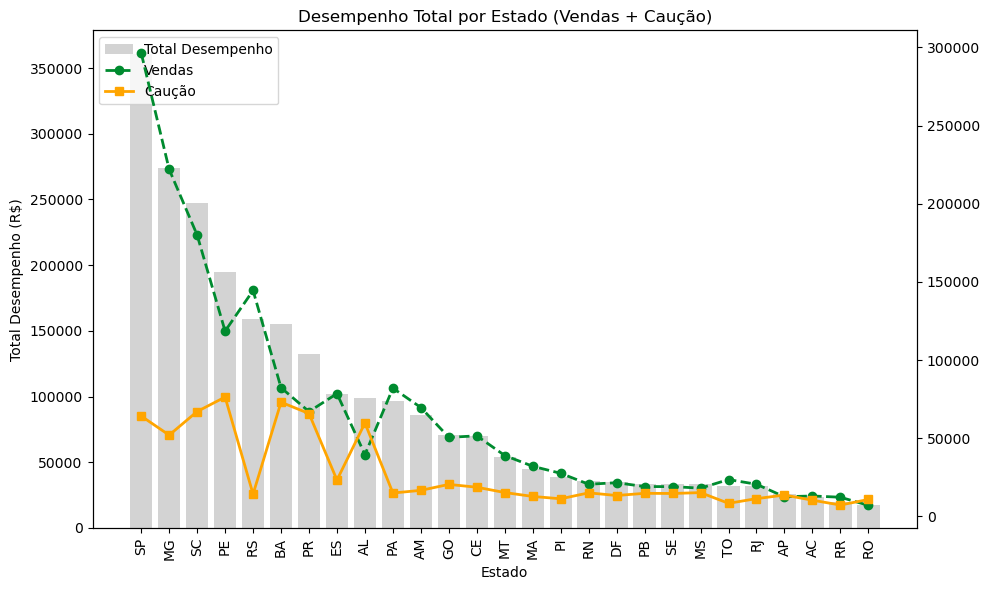

In [40]:
def finaliza_grafico(ax, criterio_desc):
    ax.set_ylabel('Desempenho (R$)')
    ax.set_xlabel('Estado')
    ax.legend()
    ax.set_title(criterio_desc)
    ax.tick_params(axis='x', rotation=90)
    plt.tight_layout()
    plt.show()

# Gráfico de barras para o desempenho total por estado, vendas e caução
def plota_graficos(desempenho):
    estados = desempenho.index
    total_desempenho = desempenho['Total Desempenho']
    vendas = desempenho['Valor de Entrada']
    caucao = desempenho['Caução']
    
    fig, ax = plt.subplots(figsize=(10, 6))

    ax.bar(estados, total_desempenho, color='lightgray', label='Total Desempenho')

    # Segunda linha (vendas)
    ax2 = ax.twinx()
    ax2.plot(estados, vendas, color='#008b2f', linewidth=2, linestyle='--', label='Vendas', marker='o')
    ax2.plot(estados, caucao, color='orange', linewidth=2, linestyle='-', label='Caução', marker='s')

    ax.set_ylabel('Total Desempenho (R$)')
    ax.set_xlabel('Estado')
    ax.set_title('Desempenho Total por Estado (Vendas + Caução)')

    lines1, labels1 = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

    ax.set_xticks(range(len(estados)))
    ax.set_xticklabels(estados, rotation=90)
    plt.tight_layout()
    plt.show()
plota_graficos(desempenho)

Mesmo grafico anterior mas feito de modo interativo

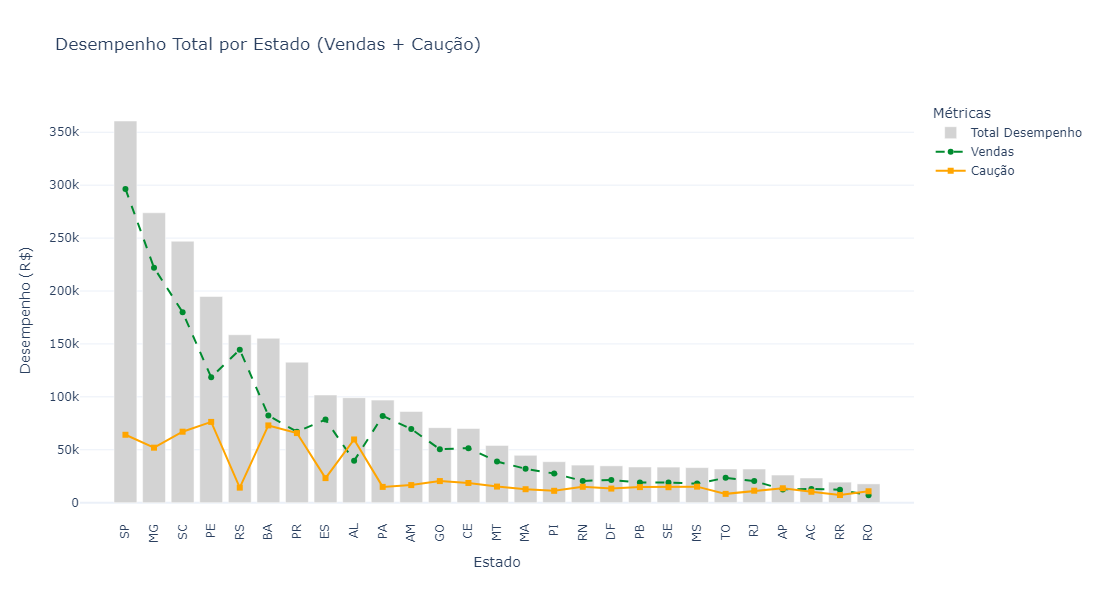

In [41]:
import plotly.graph_objects as go

# Função para criar gráfico interativo
def plota_graficos_interativo(desempenho):
    estados = desempenho.index
    total_desempenho = desempenho['Total Desempenho']
    vendas = desempenho['Valor de Entrada']
    caucao = desempenho['Caução']

    # Criando gráfico de barras para Total Desempenho
    fig = go.Figure()

    fig.add_trace(go.Bar(
        x=estados, 
        y=total_desempenho, 
        name='Total Desempenho', 
        marker_color='lightgray'
    ))

    # Adicionando as linhas para Vendas e Caução
    fig.add_trace(go.Scatter(
        x=estados, 
        y=vendas, 
        name='Vendas', 
        mode='lines+markers',
        line=dict(color='#008b2f', dash='dash'),
        marker=dict(symbol='circle')
    ))

    fig.add_trace(go.Scatter(
        x=estados, 
        y=caucao, 
        name='Caução', 
        mode='lines+markers',
        line=dict(color='orange'),
        marker=dict(symbol='square')
    ))

    # Ajustando os títulos e layout
    fig.update_layout(
        title='Desempenho Total por Estado (Vendas + Caução)',
        xaxis_title='Estado',
        yaxis_title='Desempenho (R$)',
        legend_title='Métricas',
        xaxis_tickangle=-90,  # Rotaciona os nomes dos estados
        template='plotly_white',  # Escolhe um tema para o gráfico
        width=800, height=600
    )

    fig.show()

# Exemplo de uso com df_sorted
plota_graficos_interativo(desempenho)

Logo em seguida foi feita uma análise para avaliar o desempenho das filiais por estado, considerando a quantidade de transações de "Aluguel" e "Venda" (A/V). Permitindo uma visão clara do desempenho das filiais em termos de aluguéis e vendas.
* Agrupando os dados por estado e tipo de transação (A/V) e contarndo quantas transações de cada tipo ocorreram.
* Foi feito o Calculo total de transações por estado (somando aluguéis e vendas).
* Foi ordenado os estados com base no total de transações, para destacar os que têm maior volume de operações.

In [21]:
desempenho_filiais = df.groupby(['Estado', 'A/V']).size().unstack(fill_value=0)

desempenho_filiais['Total'] = desempenho_filiais.sum(axis=1)
desempenho_filiais_ordenado = desempenho_filiais.sort_values(by='Total', ascending=False)

desempenho_filiais_ordenado

A/V,Aluguel,Venda,Total
Estado,,,
SP,108,134,242
SC,118,76,194
MG,86,100,186
PE,127,52,179
BA,114,36,150
PR,102,28,130
AL,105,18,123
RS,22,68,90
ES,38,32,70


Em seguida quis plotar um gráfico para ficar mais fácil a visualização dos dados obtidos no código anterior

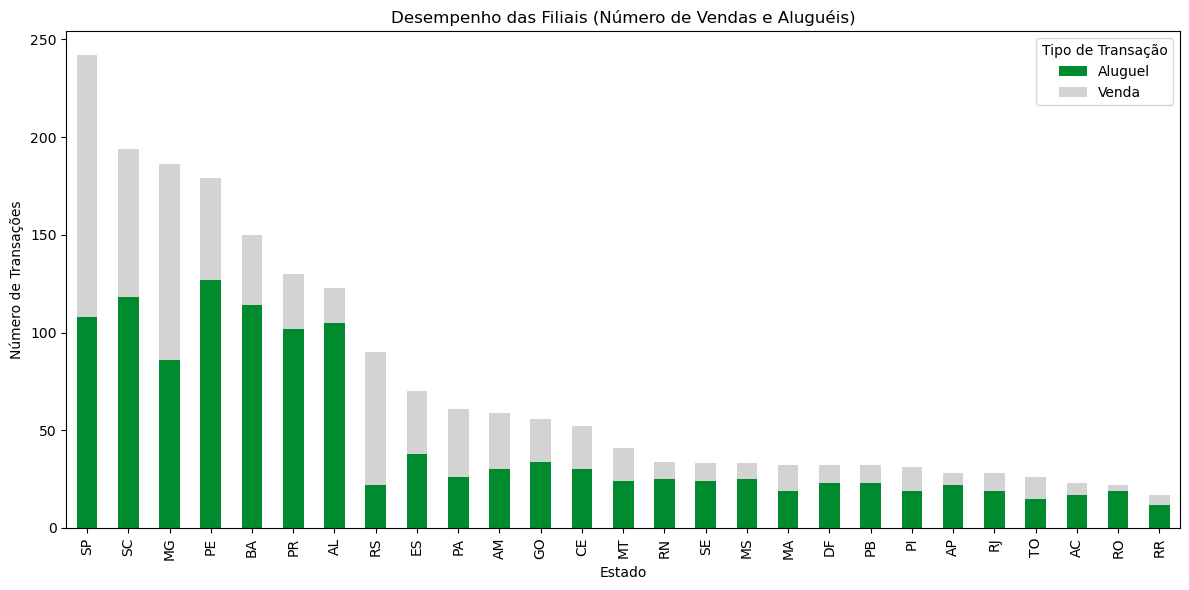

In [43]:
desempenho_filiais_ordenado[['Aluguel', 'Venda']].plot(kind='bar', stacked=True, figsize=(12, 6), color=['#008b2f', 'lightgray'])

plt.title('Desempenho das Filiais (Número de Vendas e Aluguéis)')
plt.xlabel('Estado')
plt.ylabel('Número de Transações')
plt.xticks(rotation=90)
plt.legend(title='Tipo de Transação')
plt.tight_layout()
plt.show()

Mesmo grafico anterior mas feito de modo interativo

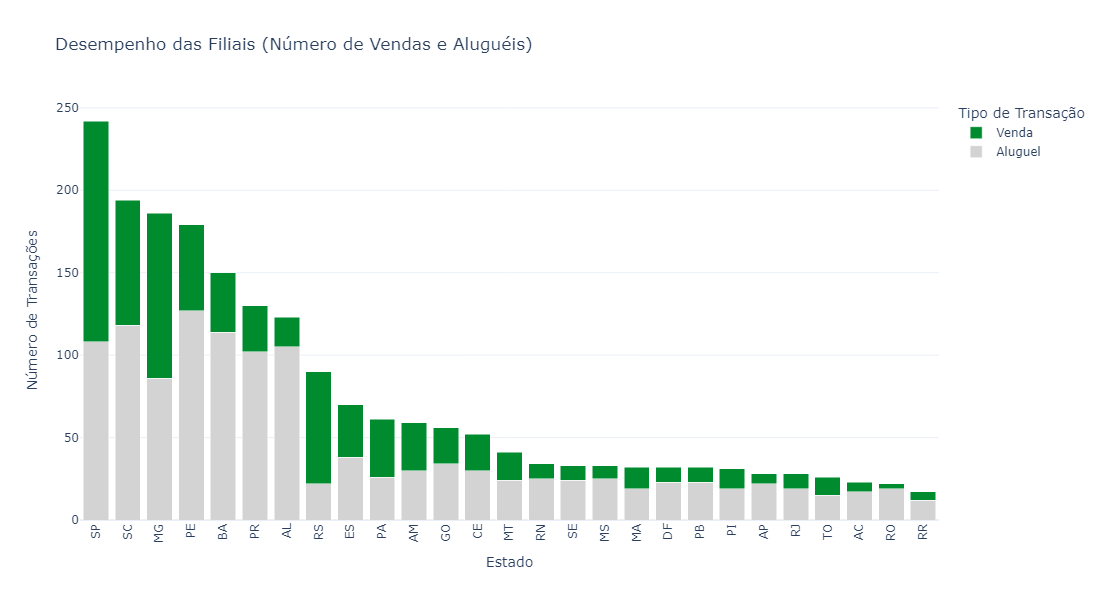

In [35]:
def plota_grafico_interativo(df):
    estados = df.index
    aluguel = df['Aluguel']
    venda = df['Venda']

    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=estados,
        y=aluguel,
        name='Aluguel',
        marker_color='lightgray'
    ))

    fig.add_trace(go.Bar(
        x=estados,
        y=venda,
        name='Venda',
        marker_color='#008b2f'
    ))

    fig.update_layout(
        barmode='stack',
        title='Desempenho das Filiais (Número de Vendas e Aluguéis)',
        xaxis_title='Estado',
        yaxis_title='Número de Transações',
        legend_title='Tipo de Transação',
        xaxis_tickangle=-90, 
        width=800,
        height=600,
        template='plotly_white'
    )

    fig.show()
plota_grafico_interativo(desempenho_filiais_ordenado)

Para se ter noção real dos faturamentos foi preciso fazer um cálculo de lucro onde calculei o faturamento mensal por vendas e por aluguéis, depois somei esses dois valores para obter o faturamento total de cada filial, e por último ordenei as filiais com base no faturamento total, do maior para o menor.
Assim vamos ter a noção real dos faturamentos das filiais.

Como os valores do alguel e de venda podem alternar os valores dos resultados podem estar errados.

In [26]:
valor_venda = 2000  # Entrada à vista para venda
valor_aluguel = 135  # Valor semanal do aluguel

# faturamento mensal por venda e aluguel
faturamento_filiais = desempenho_filiais.copy()
faturamento_filiais['Faturamento Venda'] = desempenho_filiais['Venda'] * valor_venda
faturamento_filiais['Faturamento Aluguel'] = desempenho_filiais['Aluguel'] * valor_aluguel * 4  # 4 semanas por mês

# Somando o faturamento total
faturamento_filiais['Faturamento Total'] = faturamento_filiais['Faturamento Venda'] + faturamento_filiais['Faturamento Aluguel']

# Ordenando as filiais pelo faturamento total
faturamento_filiais_ordenado = faturamento_filiais.sort_values(by='Faturamento Total', ascending=False)
faturamento_filiais_ordenado[['Faturamento Venda', 'Faturamento Aluguel', 'Faturamento Total']]

A/V,Faturamento Venda,Faturamento Aluguel,Faturamento Total
Estado,,,
SP,268000,58320,326320
MG,200000,46440,246440
SC,152000,63720,215720
PE,104000,68580,172580
RS,136000,11880,147880
BA,72000,61560,133560
PR,56000,55080,111080
AL,36000,56700,92700
ES,64000,20520,84520


Aqui separei os mêses e criei uma coluna para ela, para faciliatar na hora de plotar o gráfico.

In [27]:
df["Mes"]=df.Data.dt.month

Logo em seguida formatei o tipo do dado, para que ficasse no padrão correto e melhorar a análise.

In [28]:
df['Mes'] = df['Data'].dt.to_period('M')

In [29]:
df

,Data,A/V,Estado,Valor de Entrada,Caução,Mes
0,2024-01-08,Aluguel,GO,NaN,700.0,2024-01
1,2024-01-08,Aluguel,PR,NaN,500.0,2024-01
2,2024-01-08,Venda,GO,2500.0,NaN,2024-01
3,2024-01-08,Aluguel,AM,NaN,500.0,2024-01
4,2024-01-08,Aluguel,BA,NaN,500.0,2024-01
...,...,...,...,...,...,...
1999,2024-08-31,Aluguel,SC,NaN,500.0,2024-08
2000,2024-08-31,Aluguel,BA,NaN,500.0,2024-08
2001,2024-08-31,Aluguel,MT,NaN,500.0,2024-08
2002,2024-08-31,Aluguel,AC,NaN,700.0,2024-08


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2004 entries, 0 to 2003
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Data              2004 non-null   datetime64[ns]
 1   A/V               2004 non-null   string        
 2   Estado            2004 non-null   string        
 3   Valor de Entrada  778 non-null    float64       
 4   Caução            1226 non-null   float64       
 5   Mes               2004 non-null   period[M]     
dtypes: datetime64[ns](1), float64(2), period[M](1), string(2)
memory usage: 94.1 KB


Com o função a seguir já consgeuimos ter noção que em agosto tem um maior indice de vendas.

In [31]:
df.Mes.value_counts()

Mes
2024-08    1139
2024-12     127
2024-05      98
2024-01      87
2024-06      85
2024-02      84
2024-07      82
2024-09      78
2024-03      71
2024-10      63
2024-04      49
2024-11      41
Freq: M, Name: count, dtype: int64

Quis fazer um gráfico linha que mostra-se as tendências de "Aluguéis" e "Vendas" ao longo dos meses. Ele nos permite identificar padrões sazonais ou mensais nas transações, além de comparar diretamente os volumes de aluguéis e vendas em cada período.

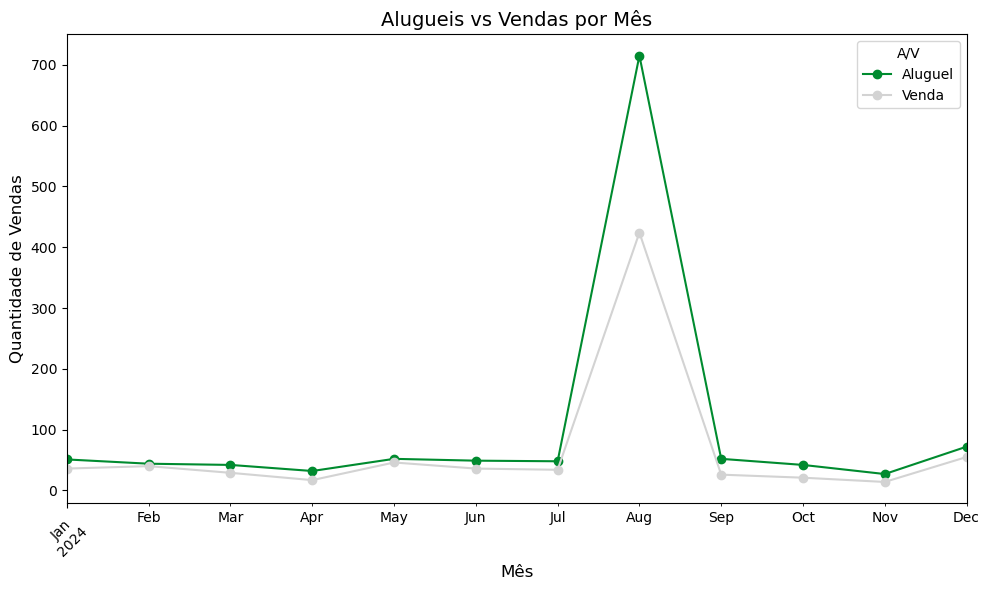

In [39]:
av_monthly_count = df.groupby(['Mes', 'A/V']).size().unstack(fill_value=0)
plt.figure(figsize=(10,6))
av_monthly_count.plot(kind='line', marker='o', ax=plt.gca(), color=['#008b2f', 'lightgray'])


plt.title('Alugueis vs Vendas por Mês', fontsize=14)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Quantidade de Vendas', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="A/V", fontsize=10)


plt.tight_layout()
plt.show()